In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)

In [5]:
dataset_link = "https://archive.ics.uci.edu/dataset/222/bank+marketing"

In [6]:
data = pd.read_csv(r"C:\Users\solat\Downloads\bank_edited_file.csv")
data 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,35,technician,single,tertiary,no,172,yes,yes,cellular,18,nov,52,1,-1,0,unknown,no
1,33,admin.,married,secondary,no,2711,no,no,cellular,20,nov,184,1,104,1,failure,no
2,33,admin.,single,secondary,no,745,yes,no,cellular,17,apr,278,2,333,1,other,no
3,37,admin.,divorced,secondary,no,34,yes,no,unknown,9,may,144,3,-1,0,unknown,no
4,35,technician,married,secondary,no,1057,yes,no,cellular,21,jul,144,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9037,39,blue-collar,married,secondary,no,2299,yes,no,cellular,20,apr,450,1,271,1,failure,no
9038,36,technician,married,secondary,no,58,no,no,cellular,3,feb,24,2,-1,0,unknown,no
9039,49,management,divorced,tertiary,no,178,no,no,cellular,6,aug,174,2,-1,0,unknown,no
9040,38,management,single,tertiary,no,2454,yes,no,cellular,14,aug,373,2,-1,0,unknown,no


In [7]:
data.shape

(9042, 17)

In [8]:
df = data.copy()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,35,technician,single,tertiary,no,172,yes,yes,cellular,18,nov,52,1,-1,0,unknown,no
1,33,admin.,married,secondary,no,2711,no,no,cellular,20,nov,184,1,104,1,failure,no
2,33,admin.,single,secondary,no,745,yes,no,cellular,17,apr,278,2,333,1,other,no
3,37,admin.,divorced,secondary,no,34,yes,no,unknown,9,may,144,3,-1,0,unknown,no
4,35,technician,married,secondary,no,1057,yes,no,cellular,21,jul,144,2,-1,0,unknown,no


In [9]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,35,technician,single,tertiary,no,172,yes,yes,cellular,18,nov,52,1,-1,0,unknown,no
1,33,admin.,married,secondary,no,2711,no,no,cellular,20,nov,184,1,104,1,failure,no
2,33,admin.,single,secondary,no,745,yes,no,cellular,17,apr,278,2,333,1,other,no
3,37,admin.,divorced,secondary,no,34,yes,no,unknown,9,may,144,3,-1,0,unknown,no
4,35,technician,married,secondary,no,1057,yes,no,cellular,21,jul,144,2,-1,0,unknown,no


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9042 entries, 0 to 9041
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9042 non-null   int64 
 1   job        9042 non-null   object
 2   marital    9042 non-null   object
 3   education  9042 non-null   object
 4   default    9042 non-null   object
 5   balance    9042 non-null   int64 
 6   housing    9042 non-null   object
 7   loan       9042 non-null   object
 8   contact    9042 non-null   object
 9   day        9042 non-null   int64 
 10  month      9042 non-null   object
 11  duration   9042 non-null   int64 
 12  campaign   9042 non-null   int64 
 13  pdays      9042 non-null   int64 
 14  previous   9042 non-null   int64 
 15  poutcome   9042 non-null   object
 16  y          9042 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


In [12]:
cat_cols_name =  df.select_dtypes(include="object").columns
cat_cols_name

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [13]:
num_cols_name = df.select_dtypes(exclude="object").columns
num_cols_name

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [14]:
df[cat_cols_name]

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,technician,single,tertiary,no,yes,yes,cellular,nov,unknown,no
1,admin.,married,secondary,no,no,no,cellular,nov,failure,no
2,admin.,single,secondary,no,yes,no,cellular,apr,other,no
3,admin.,divorced,secondary,no,yes,no,unknown,may,unknown,no
4,technician,married,secondary,no,yes,no,cellular,jul,unknown,no
...,...,...,...,...,...,...,...,...,...,...
9037,blue-collar,married,secondary,no,yes,no,cellular,apr,failure,no
9038,technician,married,secondary,no,no,no,cellular,feb,unknown,no
9039,management,divorced,tertiary,no,no,no,cellular,aug,unknown,no
9040,management,single,tertiary,no,yes,no,cellular,aug,unknown,no


In [15]:
df[num_cols_name]

,age,balance,day,duration,campaign,pdays,previous
0,35,172,18,52,1,-1,0
1,33,2711,20,184,1,104,1
2,33,745,17,278,2,333,1
3,37,34,9,144,3,-1,0
4,35,1057,21,144,2,-1,0
...,...,...,...,...,...,...,...
9037,39,2299,20,450,1,271,1
9038,36,58,3,24,2,-1,0
9039,49,178,6,174,2,-1,0
9040,38,2454,14,373,2,-1,0


In [16]:
def get_cat_nunique():
    for i in cat_cols_name:
        print(f"{i} has unique vals : {df[i].unique()}")

get_cat_nunique()

job has unique vals : ['technician' 'admin.' 'retired' 'blue-collar' 'services' 'student'
 'management' 'self-employed' 'entrepreneur' 'housemaid' 'unknown'
 'unemployed']
marital has unique vals : ['single' 'married' 'divorced']
education has unique vals : ['tertiary' 'secondary' 'primary' 'unknown']
default has unique vals : ['no' 'yes']
housing has unique vals : ['yes' 'no']
loan has unique vals : ['yes' 'no']
contact has unique vals : ['cellular' 'unknown' 'telephone']
month has unique vals : ['nov' 'apr' 'may' 'jul' 'jun' 'aug' 'sep' 'feb' 'jan' 'oct' 'mar' 'dec']
poutcome has unique vals : ['unknown' 'failure' 'other' 'success']
y has unique vals : ['no' 'yes']


In [17]:
df.describe(include="all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,9042.000000,9042,9042,9042,9042,9042.000000,9042,9042,9042,9042.000000,9042,9042.000000,9042.000000,9042.000000,9042.000000,9042,9042
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,1941,5396,4630,8858,NaN,5029,7618,5858,NaN,2731,NaN,NaN,NaN,NaN,7362,8003
mean,40.949458,NaN,NaN,NaN,NaN,1362.425238,NaN,NaN,NaN,15.738111,NaN,257.538929,2.736894,41.361203,0.581619,NaN,NaN
std,10.524787,NaN,NaN,NaN,NaN,3098.186676,NaN,NaN,NaN,8.314921,NaN,253.205078,3.098627,101.483634,1.929698,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-3372.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,76.000000,NaN,NaN,NaN,8.000000,NaN,103.250000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,447.000000,NaN,NaN,NaN,16.000000,NaN,182.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1399.000000,NaN,NaN,NaN,21.000000,NaN,320.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [18]:
df1 = df.replace("NaN", np.nan)
df1.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [19]:
for i in cat_cols_name:
    print(f"{i} {df[i].nunique()}")

job 12
marital 3
education 4
default 2
housing 2
loan 2
contact 3
month 12
poutcome 4
y 2


In [20]:
import scipy.stats as stat

((array([-3.78564347, -3.55909342, -3.43465063, ...,  3.43465063,
          3.55909342,  3.78564347]),
  array([   0,    3,    4, ..., 2653, 2775, 4918], dtype=int64)),
 (216.09718114324073, 257.5389294403892, 0.8531600876310862))

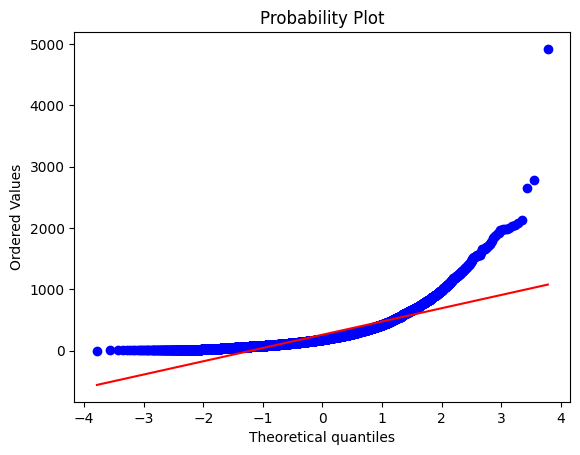

In [21]:
stat.probplot(df["duration"],plot=plt)

In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,35,technician,single,tertiary,no,172,yes,yes,cellular,18,nov,52,1,-1,0,unknown,no
1,33,admin.,married,secondary,no,2711,no,no,cellular,20,nov,184,1,104,1,failure,no
2,33,admin.,single,secondary,no,745,yes,no,cellular,17,apr,278,2,333,1,other,no
3,37,admin.,divorced,secondary,no,34,yes,no,unknown,9,may,144,3,-1,0,unknown,no
4,35,technician,married,secondary,no,1057,yes,no,cellular,21,jul,144,2,-1,0,unknown,no


In [23]:
education_vs_job = pd.crosstab(df.job, df.education,margins=True,margins_name="Total")
education_vs_job

education,primary,secondary,tertiary,unknown,Total
job,,,,,
admin.,40,809,135,37,1021
blue-collar,735,1085,35,86,1941
entrepreneur,44,107,145,13,309
housemaid,134,77,34,11,256
management,54,216,1561,42,1873
retired,153,192,72,29,446
self-employed,23,125,166,11,325
services,67,708,33,28,836
student,7,104,47,31,189


In [24]:
from scipy.stats import chi2_contingency

stat,p,dof,expected = chi2_contingency(education_vs_job)


In [25]:
stat, p , dof , expected

(5610.768831868243,
 0.0,
 48,
 array([[1.52664455e+02, 5.22808007e+02, 3.04425570e+02, 4.11019686e+01,
         1.02100000e+03],
        [2.90226941e+02, 9.93898474e+02, 5.78736563e+02, 7.81380226e+01,
         1.94100000e+03],
        [4.62030524e+01, 1.58224950e+02, 9.21327140e+01, 1.24392833e+01,
         3.09000000e+02],
        [3.82782570e+01, 1.31086043e+02, 7.63300155e+01, 1.03056846e+01,
         2.56000000e+02],
        [2.80059279e+02, 9.59078744e+02, 5.58461402e+02, 7.54005751e+01,
         1.87300000e+03],
        [6.66879009e+01, 2.28376465e+02, 1.32981199e+02, 1.79544349e+01,
         4.46000000e+02],
        [4.85954435e+01, 1.66417828e+02, 9.69033400e+01, 1.30833886e+01,
         3.25000000e+02],
        [1.25002433e+02, 4.28077859e+02, 2.49265207e+02, 3.36545012e+01,
         8.36000000e+02],
        [2.82601194e+01, 9.67783676e+01, 5.63530192e+01, 7.60849370e+00,
         1.89000000e+02],
        [2.30716213e+02, 7.90100641e+02, 4.60067242e+02, 6.21159036e+01,
     

In [26]:
ALPHA = 0.05

In [27]:
cat_cols_name , len(cat_cols_name)

(Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
        'month', 'poutcome', 'y'],
       dtype='object'),
 10)

In [72]:
dictionary = {}

for i in range(len(cat_cols_name)):
    list_of_cols = []
    for j in range(i+1, len(cat_cols_name)):

        cross_data = pd.crosstab(df[cat_cols_name[i]], df[cat_cols_name[j]])
        stat, p, dof, expected = chi2_contingency(cross_data)

        if p <= ALPHA:
            list_of_cols.append(cat_cols_name[j])

    # print(cat_cols_name[i],":",list_of_cols)
    dictionary[cat_cols_name[i]]= list_of_cols


for i in dictionary.items():
    print(i)



('job', ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y'])
('marital', ['education', 'default', 'loan', 'contact', 'month', 'poutcome', 'y'])
('education', ['housing', 'loan', 'contact', 'month', 'poutcome', 'y'])
('default', ['loan', 'month', 'poutcome', 'y'])
('housing', ['loan', 'contact', 'month', 'poutcome', 'y'])
('loan', ['month', 'poutcome', 'y'])
('contact', ['month', 'poutcome', 'y'])
('month', ['poutcome', 'y'])
('poutcome', ['y'])
('y', [])


In [73]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,35,technician,single,tertiary,no,172,yes,yes,cellular,18,nov,52,1,-1,0,unknown,no
1,33,admin.,married,secondary,no,2711,no,no,cellular,20,nov,184,1,104,1,failure,no
2,33,admin.,single,secondary,no,745,yes,no,cellular,17,apr,278,2,333,1,other,no
3,37,admin.,divorced,secondary,no,34,yes,no,unknown,9,may,144,3,-1,0,unknown,no
4,35,technician,married,secondary,no,1057,yes,no,cellular,21,jul,144,2,-1,0,unknown,no


In [30]:
l = "default contact education month y".split()
X = df.drop(l,axis=1)
y = df["y"]
X.columns

Index(['age', 'job', 'marital', 'balance', 'housing', 'loan', 'day',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome'],
      dtype='object')

In [31]:
l1 = "default contact education month".split()
X1 = df.drop(l1,axis=1)
y1 = df["y"]
X1.columns

Index(['age', 'job', 'marital', 'balance', 'housing', 'loan', 'day',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [32]:
# X1.to_csv(r"D:\Faisal\Projects\ucl_bank\dataset\final_file_1.csv",index=False)


In [33]:
import os 

In [34]:
os.getcwd()

'd:\\Faisal\\Projects\\ucl_bank\\src\\notebook'

In [35]:
save_df = df.drop(l,axis=1)


In [36]:
# save_df.to_csv(r"D:\Faisal\Projects\ucl_bank\dataset\final_file.csv",index=False)

In [37]:
cat_col_X = X.select_dtypes(include="object").columns
cat_col_X

Index(['job', 'marital', 'housing', 'loan', 'poutcome'], dtype='object')

In [38]:
for i in cat_col_X:
    print(f"{i} has unique values : {df[i].nunique()}")

job has unique values : 12
marital has unique values : 3
housing has unique values : 2
loan has unique values : 2
poutcome has unique values : 4


In [39]:
df["poutcome"].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

# Putting it all together 

In [40]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder ,OrdinalEncoder
from sklearn.pipeline import Pipeline 

In [41]:
cat_col_X

Index(['job', 'marital', 'housing', 'loan', 'poutcome'], dtype='object')

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
one_hot_col = ["marital", "poutcome"]
ohe_hot_imp = Pipeline(steps=[
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

ordinal_col = ["job", "housing", "loan"]
ordinal_imp = Pipeline(steps=[
    (("ordinal", OrdinalEncoder()))
])

preprocessor = ColumnTransformer(transformers=[
    ("onehot", ohe_hot_imp,one_hot_col),
    ("ordinal_en", ordinal_imp,ordinal_col)
    ],remainder="passthrough")

transformer = Pipeline(steps=[("preprocessor", preprocessor)])

transformed_X_train = transformer.fit_transform(X_train)
transformed_X_test = transformer.transform(X_test)

In [44]:
preprocessor.named_transformers_

{'onehot': Pipeline(steps=[('ohe', OneHotEncoder(handle_unknown='ignore'))]),
 'ordinal_en': Pipeline(steps=[('ordinal', OrdinalEncoder())]),
 'remainder': FunctionTransformer(accept_sparse=True, check_inverse=False,
                     feature_names_out='one-to-one')}

In [45]:
preprocessor.get_feature_names_out()

array(['onehot__marital_divorced', 'onehot__marital_married',
       'onehot__marital_single', 'onehot__poutcome_failure',
       'onehot__poutcome_other', 'onehot__poutcome_success',
       'onehot__poutcome_unknown', 'ordinal_en__job',
       'ordinal_en__housing', 'ordinal_en__loan', 'remainder__age',
       'remainder__balance', 'remainder__day', 'remainder__duration',
       'remainder__campaign', 'remainder__pdays', 'remainder__previous'],
      dtype=object)

# Modelling 

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(transformed_X_train,y_train)
# rf.score(transformed_X_test,y_test)

RandomForestClassifier()

In [47]:
rf.score(transformed_X_test,y_test)

0.8993919292426755

In [48]:
# import pickle 
# with open('model.pkl', 'wb') as f:
#     pickle.dump(rf, f)

In [49]:
data_1 = pd.read_csv(r"D:\Faisal\Projects\ucl_bank\dataset\final_file.csv")
data_1.columns

Index(['age', 'job', 'marital', 'balance', 'housing', 'loan', 'day',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome'],
      dtype='object')

In [50]:
import pandas as pd

In [51]:
data_2 = pd.read_csv(r"D:\Faisal\Projects\ucl_bank\dataset\final_file_1.csv")
data_2.columns

Index(['age', 'job', 'marital', 'balance', 'housing', 'loan', 'day',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [52]:
data_2["y"].replace({"yes":1, "no":0},inplace=True)
data_2.head()

C:\Users\solat\AppData\Local\Temp\ipykernel_21788\3927334209.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_2["y"].replace({"yes":1, "no":0},inplace=True)
C:\Users\solat\AppData\Local\Temp\ipykernel_21788\3927334209.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_2["y"].replace({"

,age,job,marital,balance,housing,loan,day,duration,campaign,pdays,previous,poutcome,y
0,35,technician,single,172,yes,yes,18,52,1,-1,0,unknown,0
1,33,admin.,married,2711,no,no,20,184,1,104,1,failure,0
2,33,admin.,single,745,yes,no,17,278,2,333,1,other,0
3,37,admin.,divorced,34,yes,no,9,144,3,-1,0,unknown,0
4,35,technician,married,1057,yes,no,21,144,2,-1,0,unknown,0


In [53]:
data_2["y"].value_counts()

y
0    8003
1    1039
Name: count, dtype: int64

In [54]:
# data_2.to_csv(r"D:\Faisal\Projects\ucl_bank\dataset\final_file_2.csv",index=False)

In [55]:
for i in data_2.columns:
    print(f"{i} = request.form.get('{i}'),")

age = request.form.get('age'),
job = request.form.get('job'),
marital = request.form.get('marital'),
balance = request.form.get('balance'),
housing = request.form.get('housing'),
loan = request.form.get('loan'),
day = request.form.get('day'),
duration = request.form.get('duration'),
campaign = request.form.get('campaign'),
pdays = request.form.get('pdays'),
previous = request.form.get('previous'),
poutcome = request.form.get('poutcome'),
y = request.form.get('y'),


In [56]:
data_2.head()

,age,job,marital,balance,housing,loan,day,duration,campaign,pdays,previous,poutcome,y
0,35,technician,single,172,yes,yes,18,52,1,-1,0,unknown,0
1,33,admin.,married,2711,no,no,20,184,1,104,1,failure,0
2,33,admin.,single,745,yes,no,17,278,2,333,1,other,0
3,37,admin.,divorced,34,yes,no,9,144,3,-1,0,unknown,0
4,35,technician,married,1057,yes,no,21,144,2,-1,0,unknown,0
